# Introduction to Decision Trees and Random Forests
Decision Trees and Random Forests are powerful machine learning algorithms commonly used for classification and regression tasks. This notebook provides an overview of these algorithms, focusing on how they work and how to implement them with `scikit-learn`.

## What is a Decision Tree?
A Decision Tree is a flowchart-like structure where each internal node represents a feature question, each branch represents an answer, and each leaf node represents a final output (or class). By following the decisions from the root node down to a leaf, the model makes predictions for new data points.

## How Decision Trees Work (without Math)
A decision tree algorithm recursively splits the data based on certain feature values to maximize class separation. The splitting continues until each leaf node contains data points belonging to the same class or other criteria are met.

This process creates a clear set of **if-else rules**, making decision trees easy to interpret.

## Example Dataset
Let's load a sample dataset and visualize it to understand how decision trees work.

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


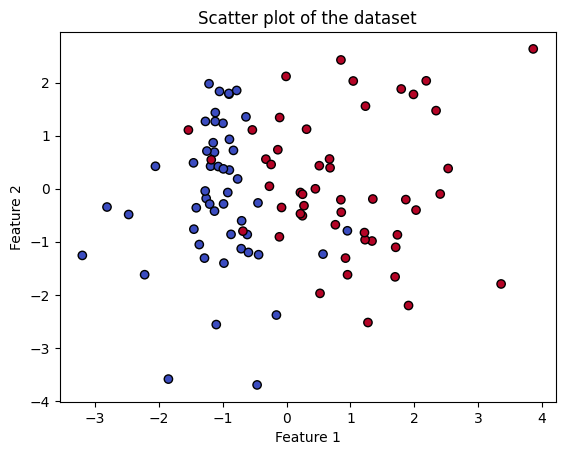

In [2]:
# Generating a synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=0)

# Visualizing the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('Scatter plot of the dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Implementing a Decision Tree
Using `scikit-learn`, we can easily train a Decision Tree model on our dataset and visualize the results.

In [3]:
# Training a Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X, y)

# Making predictions
y_pred_tree = tree_model.predict(X)
accuracy_tree = accuracy_score(y, y_pred_tree)
print(f'Accuracy (Decision Tree): {accuracy_tree}')

Accuracy (Decision Tree): 1.0


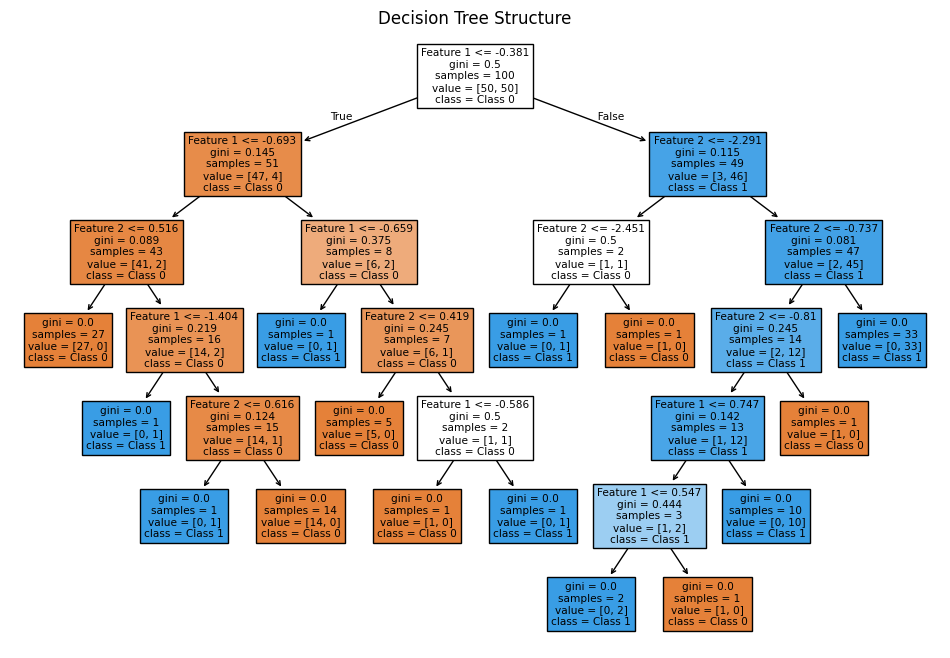

In [4]:
# Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'])
plt.title('Decision Tree Structure')
plt.show()

## Visualizing the Decision Boundary
Let's plot the decision boundary of our decision tree model to see how it separates the classes.

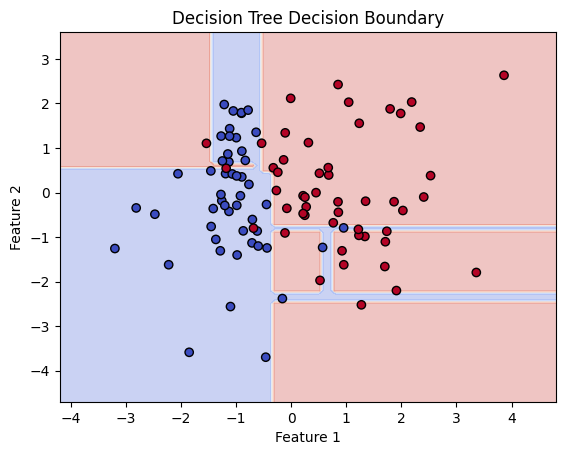

In [5]:
# Function to plot the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Tree Decision Boundary')
    plt.show()

# Plotting decision boundary
plot_decision_boundary(tree_model, X, y)

## What is a Random Forest?
A Random Forest is an ensemble method that combines multiple decision trees to improve accuracy and reduce overfitting. Each tree in a random forest is trained on a subset of the data with random feature selection, and the final prediction is made by averaging the predictions from all trees (for regression) or by voting (for classification).

## Implementing a Random Forest
Let's train a Random Forest model on our dataset and compare its performance with our single decision tree.

In [6]:
# Training a Random Forest Classifier
forest_model = RandomForestClassifier(n_estimators=10, random_state=0)
forest_model.fit(X, y)

# Making predictions
y_pred_forest = forest_model.predict(X)
accuracy_forest = accuracy_score(y, y_pred_forest)
print(f'Accuracy (Random Forest): {accuracy_forest}')

Accuracy (Random Forest): 1.0


## Visualizing the Decision Boundary for Random Forest
Since a random forest is made up of multiple trees, its decision boundary is usually smoother and more generalizable.

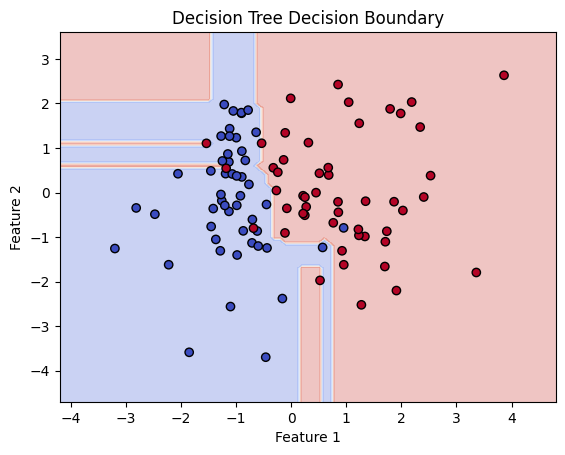

In [7]:
# Plotting decision boundary for Random Forest
plot_decision_boundary(forest_model, X, y)

## Conclusion
Decision Trees and Random Forests are versatile algorithms for both classification and regression tasks. While a single decision tree is easy to interpret, it can be prone to overfitting. Random Forests, by averaging predictions from multiple trees, often provide higher accuracy and generalization.

These models are easy to implement with `scikit-learn` and are valuable tools in the machine learning toolkit.